In [22]:
import pandas as pd
import numpy as np
import os
import lightgbm as lgb
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [18]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

In [3]:
dataset_infos = pd.read_csv(r"C:\Users\SukurovSB\Desktop\Guided_Research_New\guidedresearchproject-ShamilShukurov\data\dataset_infos.csv")

In [4]:
dataset_infos

,Unnamed: 0,Dataset_Name,Row_Count,Minority_Class_Percent,Target_Column
0,0,Abalone,1477,4.520,target
1,1,Adult,32561,24.080,target
2,2,Churn,7043,26.530,target
3,3,Contraceptive,1743,22.600,target
4,4,Covertype,581012,14.770,target
5,5,Fraud,284807,0.172,Class
6,6,Fraud2,650000,0.500,is_fraud
7,7,Letter-a,20000,3.940,letter_a
8,8,Letter-vowel,20000,19.390,is_vowel
9,9,Pendigits,10992,9.590,is_9


In [5]:
train_data_folder = r"C:\Users\SukurovSB\Desktop\train_datasets"
test_data_folder = r"C:\Users\SukurovSB\Desktop\test_datasets"

In [7]:
letter_a_train = pd.read_csv(os.path.join(train_data_folder,"letter_a_train.csv"))
letter_a_test = pd.read_csv(os.path.join(test_data_folder,"letter_a_test.csv"))

In [8]:
letter_a_train

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter_a
0,4,7,5,5,4,6,7,3,7,11,8,9,3,8,4,8,0
1,4,7,6,5,5,6,8,3,7,11,8,9,3,8,4,7,0
2,3,5,4,3,3,7,8,5,5,7,7,6,5,9,2,6,0
3,4,10,6,7,6,5,7,5,7,6,6,12,3,8,6,9,0
4,4,10,6,8,4,8,11,2,3,4,10,9,3,11,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,5,11,4,6,3,7,7,4,3,9,6,7,3,10,8,7,0
15996,3,7,5,5,4,9,11,6,4,6,5,7,2,8,6,4,0
15997,3,4,6,3,2,9,6,2,8,10,3,7,2,7,3,9,0
15998,3,8,4,6,2,7,8,0,8,14,6,6,0,8,1,7,0


In [9]:
letter_a_test

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter_a
0,3,6,5,6,4,6,7,3,8,8,6,9,3,7,7,6,0
1,4,11,6,8,8,7,8,3,5,6,6,10,6,11,7,5,0
2,3,4,5,3,2,10,2,2,1,9,2,9,2,6,2,8,1
3,2,4,2,3,2,7,7,5,7,7,6,8,2,8,5,10,0
4,4,5,5,7,3,8,7,8,6,6,7,9,3,8,5,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4,7,6,5,7,6,6,3,2,8,6,7,3,7,11,2,0
3996,2,1,3,3,1,6,12,3,6,8,11,7,1,11,1,7,0
3997,5,10,7,9,4,8,5,9,8,5,4,8,3,8,4,8,0
3998,4,5,5,7,5,10,11,5,4,5,8,8,5,10,9,5,0


In [11]:
target_col = "letter_a"

In [23]:
df_train = letter_a_train.copy()
df_test  = letter_a_test.copy()

In [33]:
X_test = df_test.drop(columns=target_col)
y_test = df_test[target_col]

## Lightgbm baseline

In [34]:
X_train = df_train.drop(columns=target_col)
y_train = df_train[target_col]

In [35]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [36]:
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)
prediction_proba_train=clf.predict_proba(X_train)
prediction_proba_test=clf.predict_proba(X_test)

In [37]:
print(classification_report(y_test,prediction_test,zero_division=True))
print(classification_report(y_train,prediction_train,zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3851
           1       0.99      0.97      0.98       149

    accuracy                           1.00      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15360
           1       1.00      1.00      1.00       640

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



No handles with labels found to put in legend.


0.999968630130063


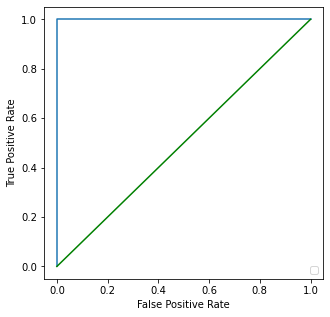

In [38]:
print(roc_auc_score(y_test, prediction_proba_test[:,1]))
plot_sklearn_roc_curve(y_test,prediction_proba_test[:,1])

## Upsample

In [39]:
df_majority = df_train[(df_train[target_col]==0)] 
df_minority = df_train[(df_train[target_col]==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= df_majority.shape[0], # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [40]:
df_upsampled

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter_a
2380,5,8,8,7,7,7,8,2,4,7,8,9,8,6,4,8,1
10460,2,1,4,2,1,9,2,2,1,8,2,8,2,6,2,7,1
6474,2,3,3,1,1,8,2,2,1,7,2,8,2,6,2,7,1
2396,3,6,5,4,3,12,3,2,2,9,2,9,2,6,2,8,1
1745,9,15,9,8,6,11,2,5,2,11,4,11,7,2,5,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,5,11,4,6,3,7,7,4,3,9,6,7,3,10,8,7,0
15996,3,7,5,5,4,9,11,6,4,6,5,7,2,8,6,4,0
15997,3,4,6,3,2,9,6,2,8,10,3,7,2,7,3,9,0
15998,3,8,4,6,2,7,8,0,8,14,6,6,0,8,1,7,0


In [41]:
X_train = df_upsampled.drop(columns=target_col)
y_train = df_upsampled[target_col]

In [42]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [43]:
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)
prediction_proba_train=clf.predict_proba(X_train)
prediction_proba_test=clf.predict_proba(X_test)

In [44]:
print(classification_report(y_test,prediction_test,zero_division=True))
print(classification_report(y_train,prediction_train,zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3851
           1       0.99      0.99      0.99       149

    accuracy                           1.00      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15360
           1       1.00      1.00      1.00     15360

    accuracy                           1.00     30720
   macro avg       1.00      1.00      1.00     30720
weighted avg       1.00      1.00      1.00     30720



No handles with labels found to put in legend.


0.9999512024245424


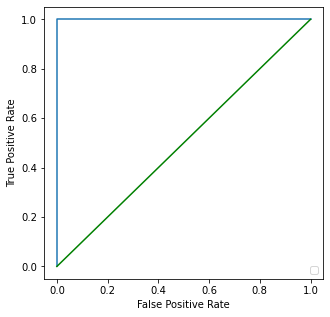

In [45]:
print(roc_auc_score(y_test, prediction_proba_test[:,1]))
plot_sklearn_roc_curve(y_test,prediction_proba_test[:,1])

## Undersample